In [2]:
import time
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import itertools
from scipy import linalg
import matplotlib as mpl
from math import *

In [3]:
weather = pd.read_csv("weather.csv")
weather['date'] = pd.to_datetime(weather['date'])

In [8]:
weather.head(2)

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
0,2014-01-01,34,24,29.0,0,0,0,JFK,40.64749,-73.779982
1,2014-01-02,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982


In [53]:
weather.columns

Index(['date', 'max_temp', 'min_temp', 'avg_temp', 'precipitation', 'snowfall',
       'snow_depth', 'location', 'latitude', 'longitude'],
      dtype='object')

In [63]:
cols = ['avg_temp', 'precipitation']

In [64]:
weather['precipitation'].iloc[11]

0.0

In [65]:
weather['precipitation'].value_counts(dropna = False)

0.00    1494
0.01      57
0.02      46
0.03      39
0.04      32
0.05      29
0.07      18
0.08      15
0.09      15
0.14      14
0.11      13
0.15      13
0.19      13
0.06      12
0.10      12
0.35      11
0.32      11
0.12      11
0.13      10
0.30       9
0.25       9
0.26       8
0.33       8
0.29       7
0.21       7
0.36       7
0.17       7
0.37       7
0.16       6
0.34       6
        ... 
2.48       1
0.49       1
1.06       1
0.59       1
0.47       1
1.27       1
1.09       1
1.15       1
1.13       1
1.60       1
3.04       1
1.61       1
0.63       1
1.58       1
1.29       1
2.54       1
0.82       1
1.46       1
1.68       1
0.94       1
0.57       1
1.30       1
0.97       1
0.58       1
0.69       1
1.12       1
0.74       1
5.26       1
2.60       1
0.81       1
Name: precipitation, dtype: int64

In [66]:
for col in cols:
    try:
        weather[col] = weather[col].apply(lambda x: np.nan if x == " " else x)
        weather[col] = weather[col].astype(float)
    except:
        print (col)

In [67]:
weather['precipitation'] = weather['precipitation'].fillna(0)

In [68]:
weather['snow_depth'] = weather['snow_depth'].fillna(0)
weather['snowfall'] = weather['snowfall'].fillna(0)
weather['precipitation'] = weather['precipitation'].fillna(0)
weather.dropna(subset=['min_temp', 'max_temp', 'avg_temp'])

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
0,2014-01-01,34.0,24.0,29.0,0.00,0.0,0.0,JFK,40.647490,-73.779982
1,2014-01-02,33.0,19.0,26.0,0.13,2.4,0.0,JFK,40.647490,-73.779982
2,2014-01-03,19.0,9.0,14.0,0.22,5.5,7.0,JFK,40.647490,-73.779982
3,2014-01-04,31.0,3.0,17.0,0.00,0.0,7.0,JFK,40.647490,-73.779982
4,2014-01-05,49.0,23.0,36.0,0.10,0.0,6.0,JFK,40.647490,-73.779982
5,2014-01-06,53.0,20.0,36.5,0.41,0.0,1.0,JFK,40.647490,-73.779982
6,2014-01-07,20.0,6.0,13.0,0.00,0.0,0.0,JFK,40.647490,-73.779982
7,2014-01-08,24.0,10.0,17.0,0.00,0.0,0.0,JFK,40.647490,-73.779982
8,2014-01-09,34.0,22.0,28.0,0.00,0.0,0.0,JFK,40.647490,-73.779982
9,2014-01-10,38.0,24.0,31.0,0.19,0.1,0.0,JFK,40.647490,-73.779982


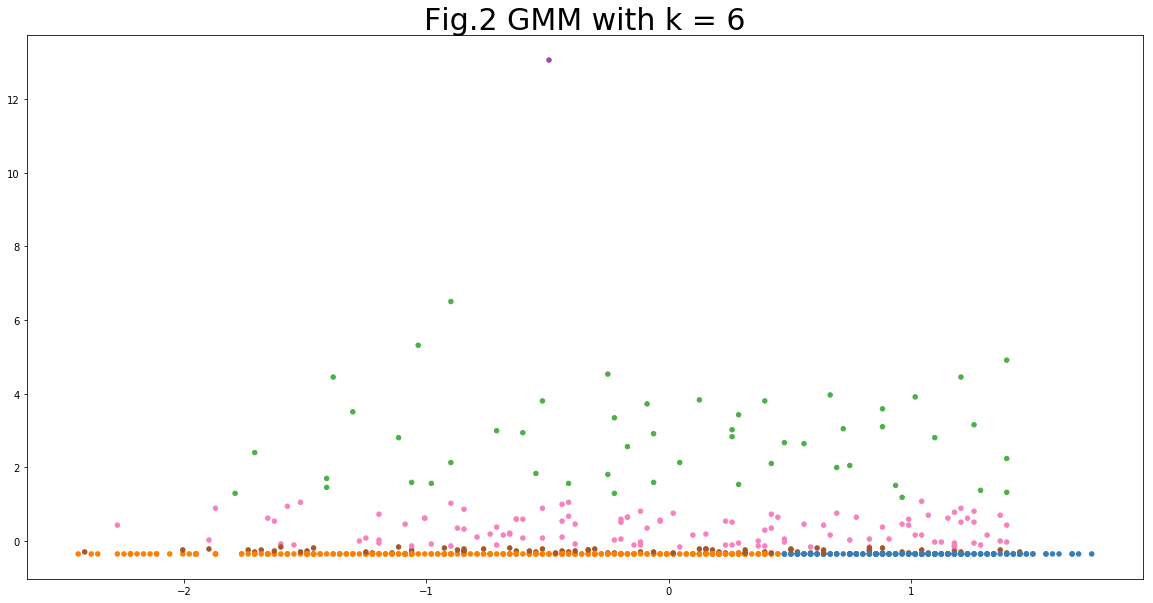

In [123]:
NumberofGaussianKernel=6
gmm = mixture.GaussianMixture(
        n_components=NumberofGaussianKernel, covariance_type='full')
X=StandardScaler().fit_transform(weather[cols])
gmm.fit(X)
y_pred = gmm.predict(X)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))

plt.figure(figsize=[20,10])
plt.scatter(X[:, 0], X[:, 1], s=20, color=colors[y_pred])
plt.title(f'Fig.2 GMM with k = {NumberofGaussianKernel}',fontsize=30)
plt.show()

In [93]:
from sklearn.cluster import KMeans

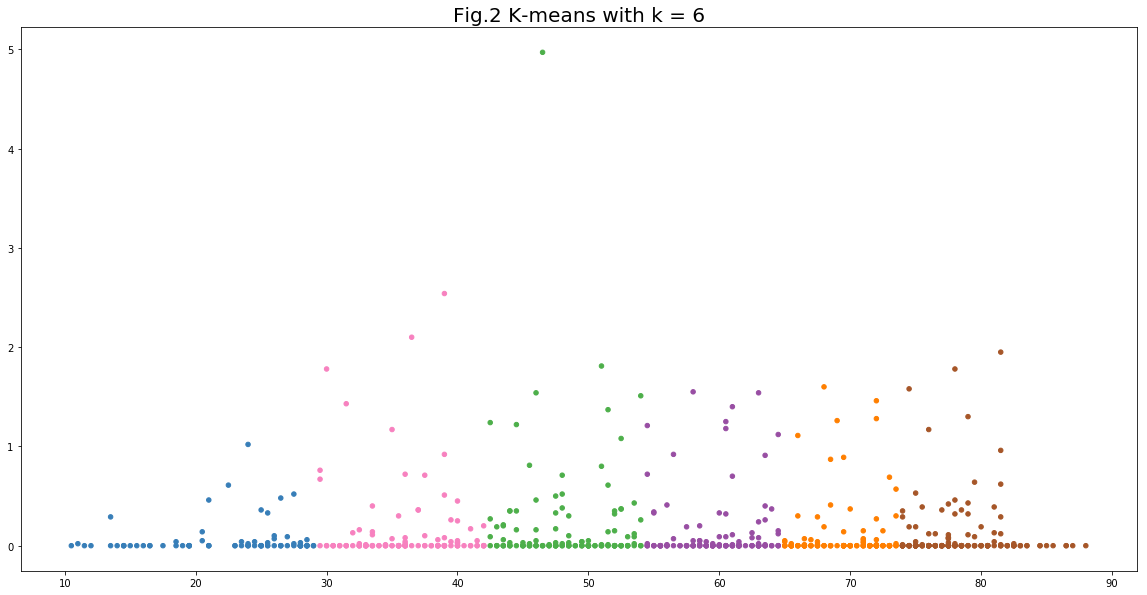

In [118]:
# raw data
kmeans = KMeans(n_clusters=6, random_state=0).fit(weather[['avg_temp','precipitation']])
y_pred = kmeans.predict(weather[['avg_temp','precipitation']])
plt.figure(figsize=(20, 10))
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
plt.scatter(weather['avg_temp'],weather['precipitation'], s=20, color=colors[y_pred])
plt.title(f'Fig.2 K-means with k = {NumberofGaussianKernel}', fontsize = 20)
plt.show()

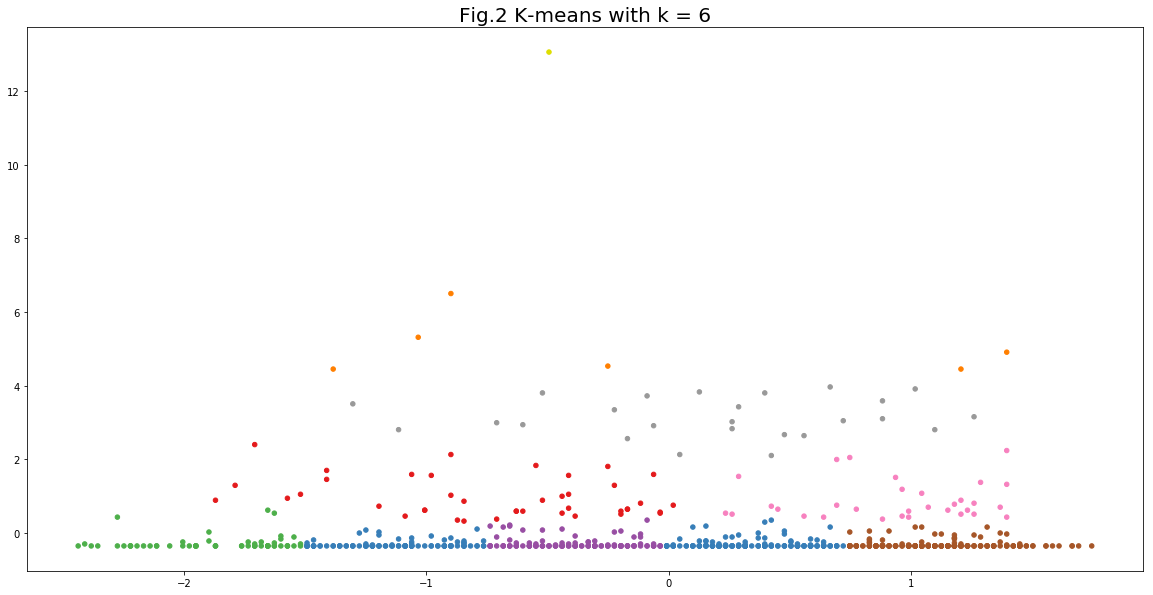

In [143]:
# standardized X
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
y_pred = kmeans.predict(X)
plt.figure(figsize=(20, 10))
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
plt.scatter(X[:,0],X[:,1], s=20, color=colors[y_pred])
plt.title(f'Fig.2 K-means with k = {NumberofGaussianKernel}', fontsize = 20)
plt.show()

In [124]:
l=list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1)))

In [129]:
c=cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00'])

In [90]:
y_pred = gmm.predict(X)

In [130]:
c

In [137]:
i=islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      10)

In [140]:
list(i)

['#377eb8',
 '#ff7f00',
 '#4daf4a',
 '#f781bf',
 '#a65628',
 '#984ea3',
 '#999999',
 '#e41a1c',
 '#dede00',
 '#377eb8']

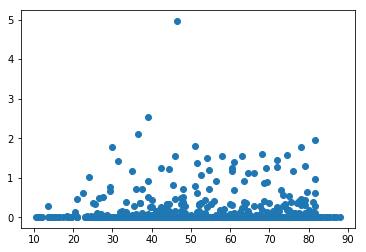

In [91]:
plt.scatter(weather['avg_temp'], weather['precipitation'])
plt.show()

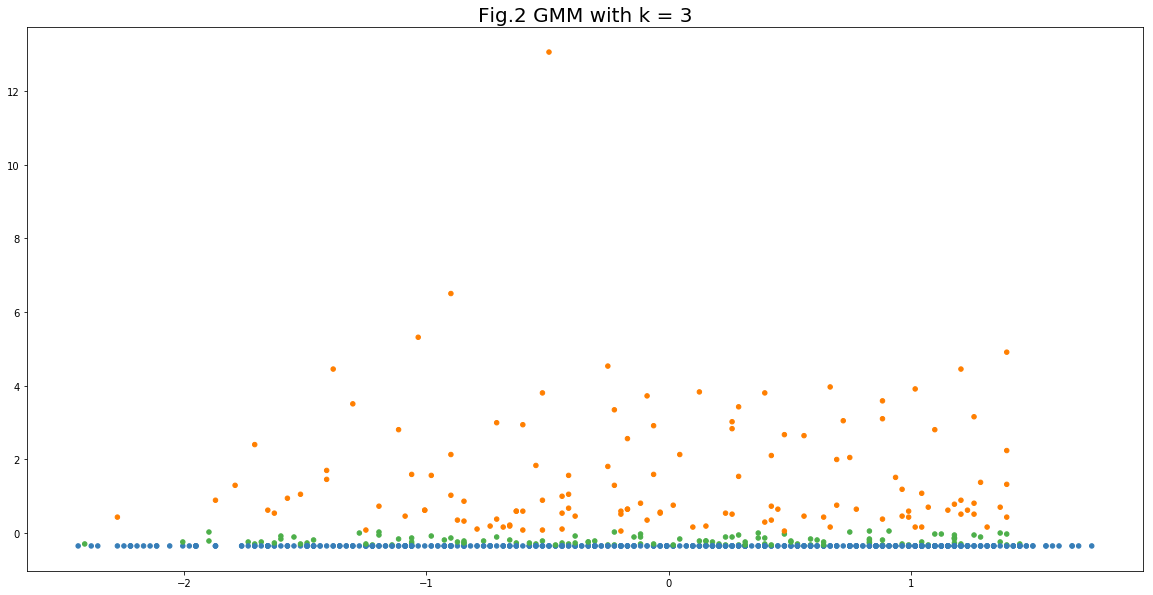

In [92]:
fig, ax = plt.subplots(figsize=(20, 10))
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], s=20, color=colors[y_pred])
plt.title(f'Fig.2 GMM with k = {NumberofGaussianKernel}', fontsize = 20)
plt.show()

In [85]:
#use Central Park as a representative 
weather = weather[weather['location']=='Central Park']

In [86]:
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
1460,2014-01-01,33.0,24.0,28.5,0.00,0.0,0.0,Central Park,40.771133,-73.974187
1461,2014-01-02,33.0,18.0,25.5,0.33,3.1,0.0,Central Park,40.771133,-73.974187
1462,2014-01-03,18.0,9.0,13.5,0.29,3.3,6.0,Central Park,40.771133,-73.974187
1463,2014-01-04,29.0,8.0,18.5,0.00,0.0,6.0,Central Park,40.771133,-73.974187
1464,2014-01-05,40.0,27.0,33.5,0.14,0.0,4.0,Central Park,40.771133,-73.974187


In [7]:
yellow_trip = pd.read_csv('yellow_trips_new.csv')

In [9]:
yellow_trip.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5


In [10]:
yellow_trip['date'] = yellow_trip['pickup_datetime'].str[:7]

In [15]:
yellow_trip['date'].unique()

array(['2014-04', '2014-05', '2014-06', '2014-08', '2014-07', '2014-09',
       '2015-03', '2015-01', '2015-02', '2015-04', '2015-05', '2015-06'], dtype=object)

In [3]:
uber_trip = pd.read_csv('uber_trips_2014.csv')

In [4]:
uber_trip.shape

(4534327, 4)

In [19]:
uber_trip['date'] = uber_trip['pickup_datetime'].str[:7]

In [23]:
uber_trip['pickup_datetime'][0]

'4/1/14 0:11'

In [5]:
uber_trip.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


In [126]:
yellow_trip = pd.read_csv("tlc_yellow_trips_2018.csv")

In [127]:
yellow_trip['pickup_dt']=pd.to_datetime(yellow_trip["pickup_datetime"])
yellow_trip['pickup_hour'] = yellow_trip['pickup_dt'].dt.hour #integer
yellow_trip['pickup_date']=pd.to_datetime(yellow_trip["pickup_dt"].dt.date)


In [131]:
yellow_trip_1=yellow_trip[(yellow_trip['pickup_date'] >= '2018-1-1') & (yellow_trip['pickup_date'] <= '2018-12-31')]

In [134]:
yellow_trip_1['pickup_date'].max()

Timestamp('2018-12-31 00:00:00')

In [ ]:
yellow_trip['pickup_dt']=pd.to_datetime(yellow_trip["pickup_datetime"])


In [ ]:
yellow_trip['pickup_hour'] = yellow_trip['pickup_dt'].dt.hour #integer
yellow_trip['pickup_date']=pd.to_datetime(yellow_trip["pickup_dt"].dt.date)
within_2018 = (yellow_trip['pickup_date'] >= '2018-1-1') & (yellow_trip['pickup_date'] <= '2018-12-31')
yellow_trip=yellow_trip['pickup_date'].loc[within_2018]
yellow_trip = yellow_trip[(yellow_trip['date'].loc[within_2018])]

In [86]:
yellow_trip['pickup_date']=yellow_trip['pickup_date'].sort_values(ascending=False)

In [121]:
yellow_trip['pickup_date'].max()

IndexError: pickup_date

In [22]:
yellow = yellow_trip.head(1000)

dtype('<M8[ns]')

In [103]:
yellow['pickup_dt']=pd.to_datetime(yellow["pickup_datetime"])

In [104]:
yellow.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_dt,pickup_datehour,date,pickup_hour,pickup_date
0,2,2018-03-16 23:30:17,2018-03-16 23:57:50,2,9.31,1,N,1,28.5,0.5,0.5,4.47,0.00,0.3,34.27,239,248,2018-03-16 23:30:17,2018-03-16,2018-03-16,23,2018-03-16
1,2,2018-03-16 23:15:41,2018-03-16 23:45:52,2,5.00,1,N,1,22.5,0.5,0.5,4.76,0.00,0.3,28.56,230,262,2018-03-16 23:15:41,2018-03-16,2018-03-16,23,2018-03-16
2,1,2018-03-16 23:00:42,2018-03-16 23:33:24,1,4.00,1,N,1,21.5,0.5,0.5,4.55,0.00,0.3,27.35,148,48,2018-03-16 23:00:42,2018-03-16,2018-03-16,23,2018-03-16
3,1,2018-03-16 22:23:43,2018-03-16 22:49:15,1,7.40,1,N,1,25.5,0.5,0.5,15.00,5.76,0.3,47.56,230,260,2018-03-16 22:23:43,2018-03-16,2018-03-16,22,2018-03-16
4,1,2018-03-16 22:14:48,2018-03-16 22:47:25,1,10.50,1,N,1,33.0,0.5,0.5,10.00,2.64,0.3,46.94,48,220,2018-03-16 22:14:48,2018-03-16,2018-03-16,22,2018-03-16


In [105]:
yellow['pickup_hour'] = yellow['pickup_dt'].dt.hour

In [135]:
yellow['pickup_dt']=pd.to_datetime(yellow["pickup_datetime"])
yellow['pickup_hour'] = yellow['pickup_dt'].dt.hour #integer
yellow['pickup_date']=pd.to_datetime(yellow["pickup_dt"].dt.date)
yellow=yellow[(yellow['pickup_date'] >= '2018-1-1') & (yellow['pickup_date'] <= '2018-12-31')]

In [136]:
pd.set_option('display.max_columns', None)
yellow.head(1)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_dt,pickup_datehour,date,pickup_hour,pickup_date
0,2,2018-03-16 23:30:17,2018-03-16 23:57:50,2,9.31,1,N,1,28.5,0.5,0.5,4.47,0.0,0.3,34.27,239,248,2018-03-16 23:30:17,2018-03-16,2018-03-16,23,2018-03-16


In [137]:
yellow['date']=pd.to_datetime(yellow['pickup_datehour'])

In [138]:
yellow['date'].head()

0   2018-03-16
1   2018-03-16
2   2018-03-16
3   2018-03-16
4   2018-03-16
Name: date, dtype: datetime64[ns]

In [139]:
zone_meta = pd.read_csv('zones.csv')

In [140]:
yellow_zone=pd.merge(yellow,zone_meta,left_on=["pickup_location_id"], right_on=["location_id"],how='left')

In [141]:
yellow_zone.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_dt,pickup_datehour,date,pickup_hour,pickup_date,location_id,borough,zone,service_zone,nta_code
0,2,2018-03-16 23:30:17,2018-03-16 23:57:50,2,9.31,1,N,1,28.5,0.5,0.5,4.47,0.00,0.3,34.27,239,248,2018-03-16 23:30:17,2018-03-16,2018-03-16,23,2018-03-16,239.0,Manhattan,Upper West Side South,Yellow Zone,MN12
1,2,2018-03-16 23:15:41,2018-03-16 23:45:52,2,5.00,1,N,1,22.5,0.5,0.5,4.76,0.00,0.3,28.56,230,262,2018-03-16 23:15:41,2018-03-16,2018-03-16,23,2018-03-16,230.0,Manhattan,Times Sq/Theatre District,Yellow Zone,MN17
2,1,2018-03-16 23:00:42,2018-03-16 23:33:24,1,4.00,1,N,1,21.5,0.5,0.5,4.55,0.00,0.3,27.35,148,48,2018-03-16 23:00:42,2018-03-16,2018-03-16,23,2018-03-16,148.0,Manhattan,Lower East Side,Yellow Zone,MN28
3,1,2018-03-16 22:23:43,2018-03-16 22:49:15,1,7.40,1,N,1,25.5,0.5,0.5,15.00,5.76,0.3,47.56,230,260,2018-03-16 22:23:43,2018-03-16,2018-03-16,22,2018-03-16,230.0,Manhattan,Times Sq/Theatre District,Yellow Zone,MN17
4,1,2018-03-16 22:14:48,2018-03-16 22:47:25,1,10.50,1,N,1,33.0,0.5,0.5,10.00,2.64,0.3,46.94,48,220,2018-03-16 22:14:48,2018-03-16,2018-03-16,22,2018-03-16,48.0,Manhattan,Clinton East,Yellow Zone,MN15


In [142]:
demographic=pd.read_csv('demographics.csv')

In [143]:
yellow_demographic=pd.merge(yellow_zone, demographic,left_on=['nta_code'],right_on=['nta_code'],how='left')

In [144]:
weather=pd.read_csv('weather.csv')

In [145]:
yellow_demographic['pickup_date'].head()

0   2018-03-16
1   2018-03-16
2   2018-03-16
3   2018-03-16
4   2018-03-16
Name: pickup_date, dtype: datetime64[ns]

In [146]:
weather['weather_date']=pd.to_datetime(weather['date'])

In [147]:
yellow_demographic_weather=pd.merge(yellow_demographic,weather,left_on=['pickup_date'],right_on=['weather_date'],how='left')

In [148]:
features=yellow_demographic[['pickup_date','pickup_hour','borough_x','nta_name','population','under_5_years','5-9_years','10-14_years','15-19_years','20-24_years','25-29_years','30-34_years','35-39_years','40-44_years','45-49_years','50-54_years','55-59_years','60-64_years','over_65_years','median_age','people_per_acre','households','median_income','mean_income','less_than_10,000','10000_to_14999','15000_to_24999','25000_to_34999','35000_to_49999','50000_to_74999','75000_to_99999','100000_to_149999','150000_to_199999','200000_or_more']]

In [149]:
features.head()

,pickup_date,pickup_hour,borough_x,nta_name,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,median_income,mean_income,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more
0,2018-03-16,23,Manhattan,Upper West Side,132378.0,7197.0,5482.0,4817.0,4338.0,6600.0,11971.0,11292.0,10406.0,10004.0,9557.0,9393.0,9469.0,9283.0,22569.0,42.0,167.3,66482.0,92268.0,161302.0,5054.0,2829.0,4048.0,3912.0,5523.0,7655.0,6109.0,9962.0,6359.0,15031.0
1,2018-03-16,23,Manhattan,Midtown-Midtown South,28630.0,819.0,408.0,326.0,1328.0,3303.0,4552.0,3419.0,2469.0,1870.0,1768.0,1559.0,1582.0,1442.0,3785.0,35.0,41.3,15944.0,114491.0,184315.0,1382.0,797.0,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0
2,2018-03-16,23,Manhattan,Lower East Side,72957.0,3406.0,3505.0,3747.0,4341.0,5721.0,6382.0,5419.0,4884.0,4780.0,4916.0,5006.0,4755.0,4141.0,11954.0,39.0,136.1,30853.0,31273.0,61257.0,4924.0,3669.0,4783.0,3184.0,2913.0,4138.0,1668.0,3082.0,807.0,1685.0
3,2018-03-16,22,Manhattan,Midtown-Midtown South,28630.0,819.0,408.0,326.0,1328.0,3303.0,4552.0,3419.0,2469.0,1870.0,1768.0,1559.0,1582.0,1442.0,3785.0,35.0,41.3,15944.0,114491.0,184315.0,1382.0,797.0,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0
4,2018-03-16,22,Manhattan,Clinton,45884.0,1299.0,851.0,771.0,1103.0,4384.0,7093.0,5878.0,4208.0,3648.0,3282.0,3009.0,2789.0,2404.0,5165.0,37.0,108.6,25095.0,73591.0,106168.0,1746.0,1601.0,1728.0,2171.0,2099.0,3405.0,2827.0,4001.0,1859.0,3658.0


In [150]:
features['weekday']=features['pickup_date'].dt.weekday_name

C:\Users\80717\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [151]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


In [152]:
cal = calendar()
holidays = cal.holidays(start=features['pickup_date'].min(), end=features['pickup_date'].max())

In [153]:
holidays

DatetimeIndex(['2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22',
               '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

In [154]:
features['is_holiday'] = features['pickup_date'].isin(holidays)

C:\Users\80717\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [157]:
features.head()

,pickup_date,pickup_hour,borough_x,nta_name,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,median_income,mean_income,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,weekday,is_holiday
0,2018-03-16,23,Manhattan,Upper West Side,132378.0,7197.0,5482.0,4817.0,4338.0,6600.0,11971.0,11292.0,10406.0,10004.0,9557.0,9393.0,9469.0,9283.0,22569.0,42.0,167.3,66482.0,92268.0,161302.0,5054.0,2829.0,4048.0,3912.0,5523.0,7655.0,6109.0,9962.0,6359.0,15031.0,Friday,False
1,2018-03-16,23,Manhattan,Midtown-Midtown South,28630.0,819.0,408.0,326.0,1328.0,3303.0,4552.0,3419.0,2469.0,1870.0,1768.0,1559.0,1582.0,1442.0,3785.0,35.0,41.3,15944.0,114491.0,184315.0,1382.0,797.0,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0,Friday,False
2,2018-03-16,23,Manhattan,Lower East Side,72957.0,3406.0,3505.0,3747.0,4341.0,5721.0,6382.0,5419.0,4884.0,4780.0,4916.0,5006.0,4755.0,4141.0,11954.0,39.0,136.1,30853.0,31273.0,61257.0,4924.0,3669.0,4783.0,3184.0,2913.0,4138.0,1668.0,3082.0,807.0,1685.0,Friday,False
3,2018-03-16,22,Manhattan,Midtown-Midtown South,28630.0,819.0,408.0,326.0,1328.0,3303.0,4552.0,3419.0,2469.0,1870.0,1768.0,1559.0,1582.0,1442.0,3785.0,35.0,41.3,15944.0,114491.0,184315.0,1382.0,797.0,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0,Friday,False
4,2018-03-16,22,Manhattan,Clinton,45884.0,1299.0,851.0,771.0,1103.0,4384.0,7093.0,5878.0,4208.0,3648.0,3282.0,3009.0,2789.0,2404.0,5165.0,37.0,108.6,25095.0,73591.0,106168.0,1746.0,1601.0,1728.0,2171.0,2099.0,3405.0,2827.0,4001.0,1859.0,3658.0,Friday,False


In [246]:
y=features.groupby(['pickup_date','pickup_hour','nta_name']).count()

In [247]:
y=y['borough_x'] #just do the counting, could be any column

In [248]:
y = y.reset_index()
y.rename(columns={'borough_x':'y'},inplace=True)

In [257]:
y

,pickup_date,pickup_hour,nta_name,y
0,2018-01-12,11,Upper West Side,1
1,2018-01-12,12,Battery Park City-Lower Manhattan,1
2,2018-01-12,12,Midtown-Midtown South,2
3,2018-01-12,13,Lenox Hill-Roosevelt Island,1
4,2018-01-12,13,Midtown-Midtown South,1
5,2018-01-12,14,SoHo-TriBeCa-Civic Center-Little Italy,1
6,2018-01-12,17,Gramercy,1
7,2018-01-12,17,Hudson Yards-Chelsea-Flat Iron-Union Square,1
8,2018-01-12,18,SoHo-TriBeCa-Civic Center-Little Italy,1
9,2018-01-12,19,Turtle Bay-East Midtown,1


In [250]:
X=features.groupby(['pickup_date','pickup_hour','nta_name']).mean()

In [260]:
X = X.reset_index()

In [261]:
X

,pickup_date,pickup_hour,nta_name,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,median_income,mean_income,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,is_holiday
0,2018-01-12,11,Upper West Side,132378.0,7197.0,5482.0,4817.0,4338.0,6600.0,11971.0,11292.0,10406.0,10004.0,9557.0,9393.0,9469.0,9283.0,22569.0,42.0,167.3,66482.0,92268.0,161302.0,5054.0,2829.0,4048.0,3912.0,5523.0,7655.0,6109.0,9962.0,6359.0,15031.0,False
1,2018-01-12,12,Battery Park City-Lower Manhattan,39699.0,2272.0,1055.0,691.0,1453.0,5203.0,7559.0,5978.0,4206.0,2823.0,1945.0,1589.0,1398.0,1182.0,2345.0,31.0,82.7,21216.0,125434.0,185275.0,1197.0,420.0,800.0,609.0,960.0,1909.0,2416.0,3878.0,2377.0,6650.0,False
2,2018-01-12,12,Midtown-Midtown South,28630.0,819.0,408.0,326.0,1328.0,3303.0,4552.0,3419.0,2469.0,1870.0,1768.0,1559.0,1582.0,1442.0,3785.0,35.0,41.3,15944.0,114491.0,184315.0,1382.0,797.0,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0,False
3,2018-01-12,13,Lenox Hill-Roosevelt Island,80771.0,4371.0,2648.0,1927.0,1624.0,5054.0,11182.0,10029.0,7096.0,5631.0,4900.0,4518.0,4555.0,4814.0,12422.0,37.0,157.8,43237.0,98797.0,157345.0,2572.0,1127.0,2026.0,2232.0,3032.0,5984.0,4880.0,7056.0,3654.0,10674.0,False
4,2018-01-12,13,Midtown-Midtown South,28630.0,819.0,408.0,326.0,1328.0,3303.0,4552.0,3419.0,2469.0,1870.0,1768.0,1559.0,1582.0,1442.0,3785.0,35.0,41.3,15944.0,114491.0,184315.0,1382.0,797.0,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0,False
5,2018-01-12,14,SoHo-TriBeCa-Civic Center-Little Italy,42742.0,2499.0,1667.0,1200.0,1236.0,3921.0,5354.0,4943.0,4284.0,3423.0,2768.0,2455.0,2517.0,2248.0,4227.0,36.0,73.5,19761.0,118931.0,235533.0,1416.0,555.0,1182.0,821.0,1159.0,2012.0,1492.0,2814.0,2020.0,6290.0,False
6,2018-01-12,17,Gramercy,27988.0,708.0,445.0,380.0,1794.0,3626.0,4811.0,3339.0,2207.0,1640.0,1451.0,1445.0,1375.0,1498.0,3269.0,33.0,163.0,14734.0,100900.0,148602.0,921.0,348.0,715.0,587.0,894.0,2044.0,1810.0,2325.0,2049.0,3041.0,False
7,2018-01-12,17,Hudson Yards-Chelsea-Flat Iron-Union Square,70150.0,2601.0,1646.0,1339.0,1891.0,6111.0,9675.0,8828.0,6684.0,6044.0,5331.0,4664.0,4070.0,3645.0,7621.0,37.0,82.4,41343.0,101369.0,182129.0,2439.0,1421.0,2694.0,2156.0,3422.0,4460.0,3866.0,6217.0,3957.0,10711.0,False
8,2018-01-12,18,SoHo-TriBeCa-Civic Center-Little Italy,42742.0,2499.0,1667.0,1200.0,1236.0,3921.0,5354.0,4943.0,4284.0,3423.0,2768.0,2455.0,2517.0,2248.0,4227.0,36.0,73.5,19761.0,118931.0,235533.0,1416.0,555.0,1182.0,821.0,1159.0,2012.0,1492.0,2814.0,2020.0,6290.0,False
9,2018-01-12,19,Turtle Bay-East Midtown,51231.0,1849.0,1076.0,761.0,993.0,3523.0,6966.0,5430.0,4026.0,3284.0,3092.0,3159.0,3463.0,3691.0,9918.0,41.0,124.7,29006.0,113998.0,196721.0,1382.0,529.0,1664.0,932.0,1975.0,3140.0,3345.0,5214.0,2669.0,8156.0,False


In [262]:
X_Y=pd.merge(X,y,on=['pickup_date','pickup_hour','nta_name'],how='right')

In [263]:
X_Y

,pickup_date,pickup_hour,nta_name,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,median_income,mean_income,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,is_holiday,y
0,2018-01-12,11,Upper West Side,132378.0,7197.0,5482.0,4817.0,4338.0,6600.0,11971.0,11292.0,10406.0,10004.0,9557.0,9393.0,9469.0,9283.0,22569.0,42.0,167.3,66482.0,92268.0,161302.0,5054.0,2829.0,4048.0,3912.0,5523.0,7655.0,6109.0,9962.0,6359.0,15031.0,False,1
1,2018-01-12,12,Battery Park City-Lower Manhattan,39699.0,2272.0,1055.0,691.0,1453.0,5203.0,7559.0,5978.0,4206.0,2823.0,1945.0,1589.0,1398.0,1182.0,2345.0,31.0,82.7,21216.0,125434.0,185275.0,1197.0,420.0,800.0,609.0,960.0,1909.0,2416.0,3878.0,2377.0,6650.0,False,1
2,2018-01-12,12,Midtown-Midtown South,28630.0,819.0,408.0,326.0,1328.0,3303.0,4552.0,3419.0,2469.0,1870.0,1768.0,1559.0,1582.0,1442.0,3785.0,35.0,41.3,15944.0,114491.0,184315.0,1382.0,797.0,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0,False,2
3,2018-01-12,13,Lenox Hill-Roosevelt Island,80771.0,4371.0,2648.0,1927.0,1624.0,5054.0,11182.0,10029.0,7096.0,5631.0,4900.0,4518.0,4555.0,4814.0,12422.0,37.0,157.8,43237.0,98797.0,157345.0,2572.0,1127.0,2026.0,2232.0,3032.0,5984.0,4880.0,7056.0,3654.0,10674.0,False,1
4,2018-01-12,13,Midtown-Midtown South,28630.0,819.0,408.0,326.0,1328.0,3303.0,4552.0,3419.0,2469.0,1870.0,1768.0,1559.0,1582.0,1442.0,3785.0,35.0,41.3,15944.0,114491.0,184315.0,1382.0,797.0,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0,False,1
5,2018-01-12,14,SoHo-TriBeCa-Civic Center-Little Italy,42742.0,2499.0,1667.0,1200.0,1236.0,3921.0,5354.0,4943.0,4284.0,3423.0,2768.0,2455.0,2517.0,2248.0,4227.0,36.0,73.5,19761.0,118931.0,235533.0,1416.0,555.0,1182.0,821.0,1159.0,2012.0,1492.0,2814.0,2020.0,6290.0,False,1
6,2018-01-12,17,Gramercy,27988.0,708.0,445.0,380.0,1794.0,3626.0,4811.0,3339.0,2207.0,1640.0,1451.0,1445.0,1375.0,1498.0,3269.0,33.0,163.0,14734.0,100900.0,148602.0,921.0,348.0,715.0,587.0,894.0,2044.0,1810.0,2325.0,2049.0,3041.0,False,1
7,2018-01-12,17,Hudson Yards-Chelsea-Flat Iron-Union Square,70150.0,2601.0,1646.0,1339.0,1891.0,6111.0,9675.0,8828.0,6684.0,6044.0,5331.0,4664.0,4070.0,3645.0,7621.0,37.0,82.4,41343.0,101369.0,182129.0,2439.0,1421.0,2694.0,2156.0,3422.0,4460.0,3866.0,6217.0,3957.0,10711.0,False,1
8,2018-01-12,18,SoHo-TriBeCa-Civic Center-Little Italy,42742.0,2499.0,1667.0,1200.0,1236.0,3921.0,5354.0,4943.0,4284.0,3423.0,2768.0,2455.0,2517.0,2248.0,4227.0,36.0,73.5,19761.0,118931.0,235533.0,1416.0,555.0,1182.0,821.0,1159.0,2012.0,1492.0,2814.0,2020.0,6290.0,False,1
9,2018-01-12,19,Turtle Bay-East Midtown,51231.0,1849.0,1076.0,761.0,993.0,3523.0,6966.0,5430.0,4026.0,3284.0,3092.0,3159.0,3463.0,3691.0,9918.0,41.0,124.7,29006.0,113998.0,196721.0,1382.0,529.0,1664.0,932.0,1975.0,3140.0,3345.0,5214.0,2669.0,8156.0,False,1


ModuleNotFoundError: No module named 'XGBoost'